<a href="https://colab.research.google.com/github/rjhanjee/my-first-repo/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
# kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id'], axis = 1)
kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 1)].copy()
kirby906a_ax_df.head()

telencephalon_L_volume = kirby906a_ax_df['volume'][kirby906a_ax_df['roi'] == 'Telencephalon_L'].item()
# adding .item() at the end converts this into a number
print("telencephalon_L_volume is ",telencephalon_L_volume)

telencephalon_R_volume = kirby906a_ax_df['volume'][kirby906a_ax_df['roi'] == 'Telencephalon_R'].item()
print("telencephalon_R_volume is ",telencephalon_R_volume)
Total_telencephalon_volume=telencephalon_R_volume + telencephalon_L_volume
print("Total_telencephalon_volume is ",Total_telencephalon_volume)

tbv = kirby906a_ax_df['tbv'][kirby906a_ax_df['roi'] == 'Telencephalon_R'].item()
print("tbv is ",tbv)
icv = kirby906a_ax_df['icv'][kirby906a_ax_df['roi'] == 'Telencephalon_R'].item()
print("icv is ",icv)
icv_fraction = icv/Total_telencephalon_volume
print("icv_fraction is ",icv_fraction)
tbv_fraction = tbv/Total_telencephalon_volume
print("tbv_fraction is ",tbv_fraction)



telencephalon_L_volume is  467063
telencephalon_R_volume is  470488
Total_telencephalon_volume is  937551
tbv is  1123076
icv is  1195015
icv_fraction is  1.2746133277016396
tbv_fraction is  1.1978825685216057


In [20]:
import pandas as pd
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id','roi'], axis = 1)
# kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 1)].copy()
kirby906a_ax_df.head()
all_regions_df = kirby906a_ax_df.groupby(['type', 'level']).sum().reset_index()

print(all_regions_df)

   type  level   volume
0     1      1  1195015
1     1      2  1195021
2     1      3  1195034
3     1      4  1195065
4     1      5  1195124
5     2      1  1195015
6     2      2  1195022
7     2      3  1195032
8     2      4  1195041
9     2      5  1195092


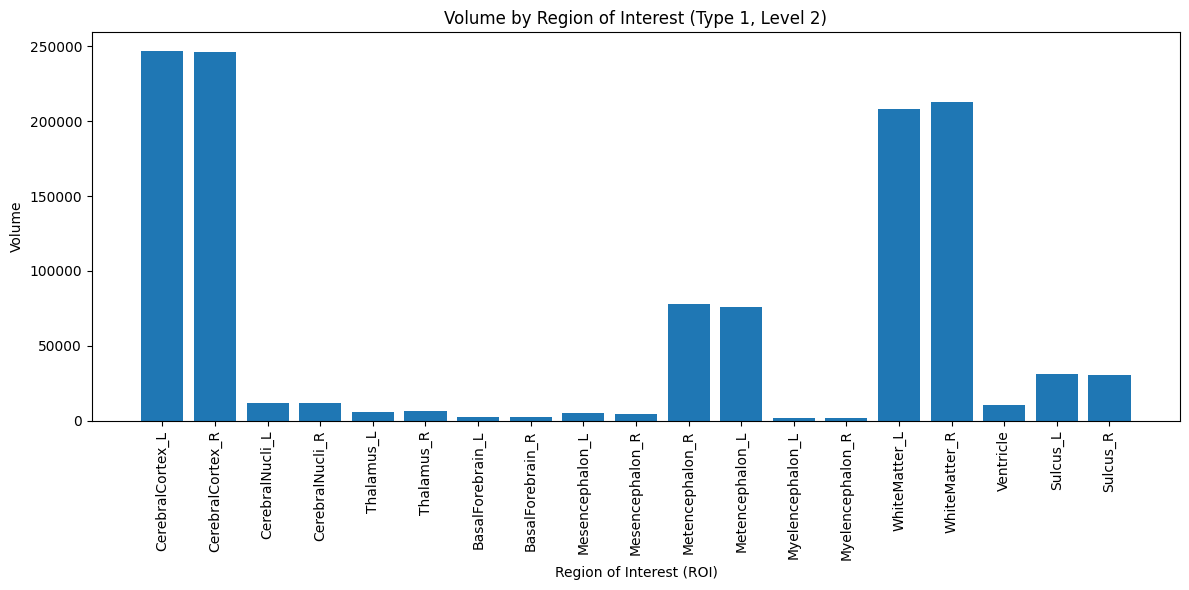

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id'], axis = 1)

kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 2)].copy()


# Use matplotlib to create the bar plot
plt.figure(figsize=(12, 6)) # Optional: Adjust figure size
plt.bar(x=kirby906a_ax_df['roi'], height=kirby906a_ax_df['volume'])
plt.xticks(rotation=90) # Optional: Rotate x-axis labels for better readability
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Volume')
plt.title('Volume by Region of Interest (Type 1, Level 2)')
plt.tight_layout() # Optional: Adjust layout to prevent labels overlapping
plt.show()

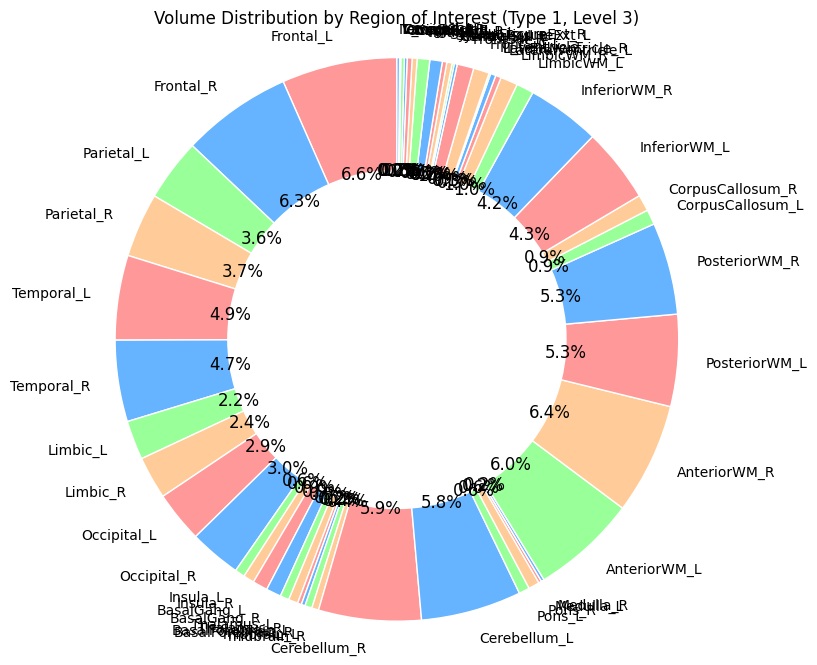

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id'], axis = 1)

kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 3)].copy()
# kirby906a_ax_df.head()

# Define sizes and labels for the pie chart
sizes = kirby906a_ax_df['volume']
labels = kirby906a_ax_df['roi']

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] # Optional: define colors

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  startangle=90, colors=colors,
                                  wedgeprops=dict(width=0.4, edgecolor='white')) # width creates the donut hole

# Add a circle in the center to make it a donut
# You can also use plt.Circle directly if you don't use wedgeprops width
# centre_circle = plt.Circle((0,0), 0.60, fc='white')
# fig.gca().add_artist(centre_circle)

# Customize the text properties (optional)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

# Set the aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')

# Add a title
ax.set_title('Volume Distribution by Region of Interest (Type 1, Level 3)')

# Display the chart
plt.show()

       Year           Program
0  Master's               BME
1  Master's               BME
2    Senior               BME
3       PhD               BME
4       PhD  Computer_Science
5  Master's               BME
6  Master's               BME
7  Master's               BME
8  Master's               BME
9  Master's               BME


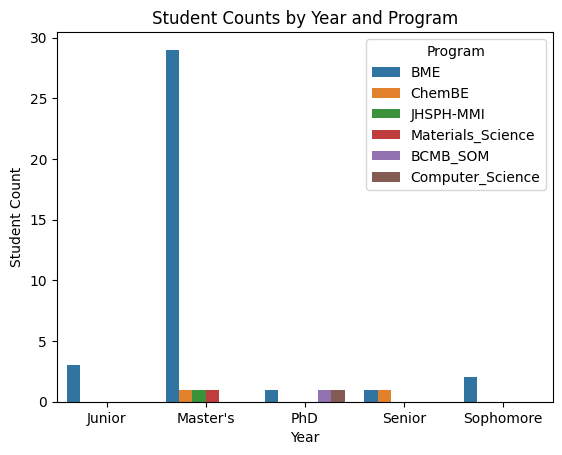

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/bcaffo/ds4bme/master/data/classInterests.txt"
class_interests_df = pd.read_csv(url, sep='\t')

print(class_interests_df.head(10))

# Group by both 'year' and 'program' and get the size of each group
plot_df = class_interests_df.groupby(['Year', 'Program']).size().reset_index(name='count')

# Create a single bar plot using seaborn
# The `x` and `hue` parameters will represent the grouping variables, and `y` will be the count
# The `barplot` function is suitable for displaying counts of categorical data
sns.barplot(data=plot_df, x='Year', y='count', hue='Program')

# Set plot labels and title for clarity
plt.title('Student Counts by Year and Program')
plt.xlabel('Year')
plt.ylabel('Student Count')

# Display the plot
plt.show()

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/GSE5859_exprs.csv"
gene_expression_df = pd.read_csv(url)


# Drop the non-numeric column before calculating the mean
numeric_gene_expression_df = gene_expression_df.drop('Unnamed: 0', axis=1)

print("Original data, limited to 4 rows, 4 columns")
print(numeric_gene_expression_df.iloc[:4, :4])
print("- " *30)

# Calculate the mean of each row for the numeric columns
row_means = numeric_gene_expression_df.mean(axis=1)

# Subtract the row mean from each row
gene_expression_df_pt1 = numeric_gene_expression_df.sub(row_means, axis=0)

print("\nDataFrame after subtracting row means: 4 rows, 4 columns ")
print(gene_expression_df_pt1.iloc[:4, :4])
print("- " *30)

# take the resulting matrix and subtract the column mean from each column
# (name it "gene_expression_df_pt2)
column_means = gene_expression_df_pt1.mean(axis=0)

gene_expression_df_pt2 = gene_expression_df_pt1.sub(column_means, axis=1)

print("\nDataFrame after subtracting column means: first 4 rows, first 4 columns")
print(gene_expression_df_pt2.iloc[:4, :4])
print("- " *30)

# Calculate the standard deviation for each column
col_std = gene_expression_df_pt2.std()

# Divide each column by its standard deviation and store it in gene_expression_df_pt3
gene_expression_df_pt3 = gene_expression_df_pt2.div(col_std)

# Print the new DataFrame with columns scaled by their standard deviation
print("DataFrame after dividing each column by its standard deviation:")
print(gene_expression_df_pt3.iloc[:4, :4])
print("- " *30)





Original data, limited to 4 rows, 4 columns
   GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  GSM136707.CEL.gz
0         6.333951         5.736190          6.156754          6.513010
1         7.255622         7.399993          7.491967          7.006123
2         5.760106         4.825169          5.039387          5.414160
3         6.935451         7.025210          7.543667          7.959781
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

DataFrame after subtracting row means: 4 rows, 4 columns 
   GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  GSM136707.CEL.gz
0        -0.049313        -0.647073         -0.226509          0.129747
1         0.163992         0.308363          0.400337         -0.085507
2         0.283074        -0.651863         -0.437645         -0.062873
3        -0.648591        -0.558832         -0.040375          0.375740
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

DataFrame after subtracting column means: first 4 rows


Original Data: first 4 rows, first 3 columns
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
        Location  1991__Total Health Spending  1992__Total Health Spending
0  United States                     675896.0                     731455.0
1        Alabama                      10393.0                      11284.0
2         Alaska                       1458.0                       1558.0
3        Arizona                       9269.0                       9815.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


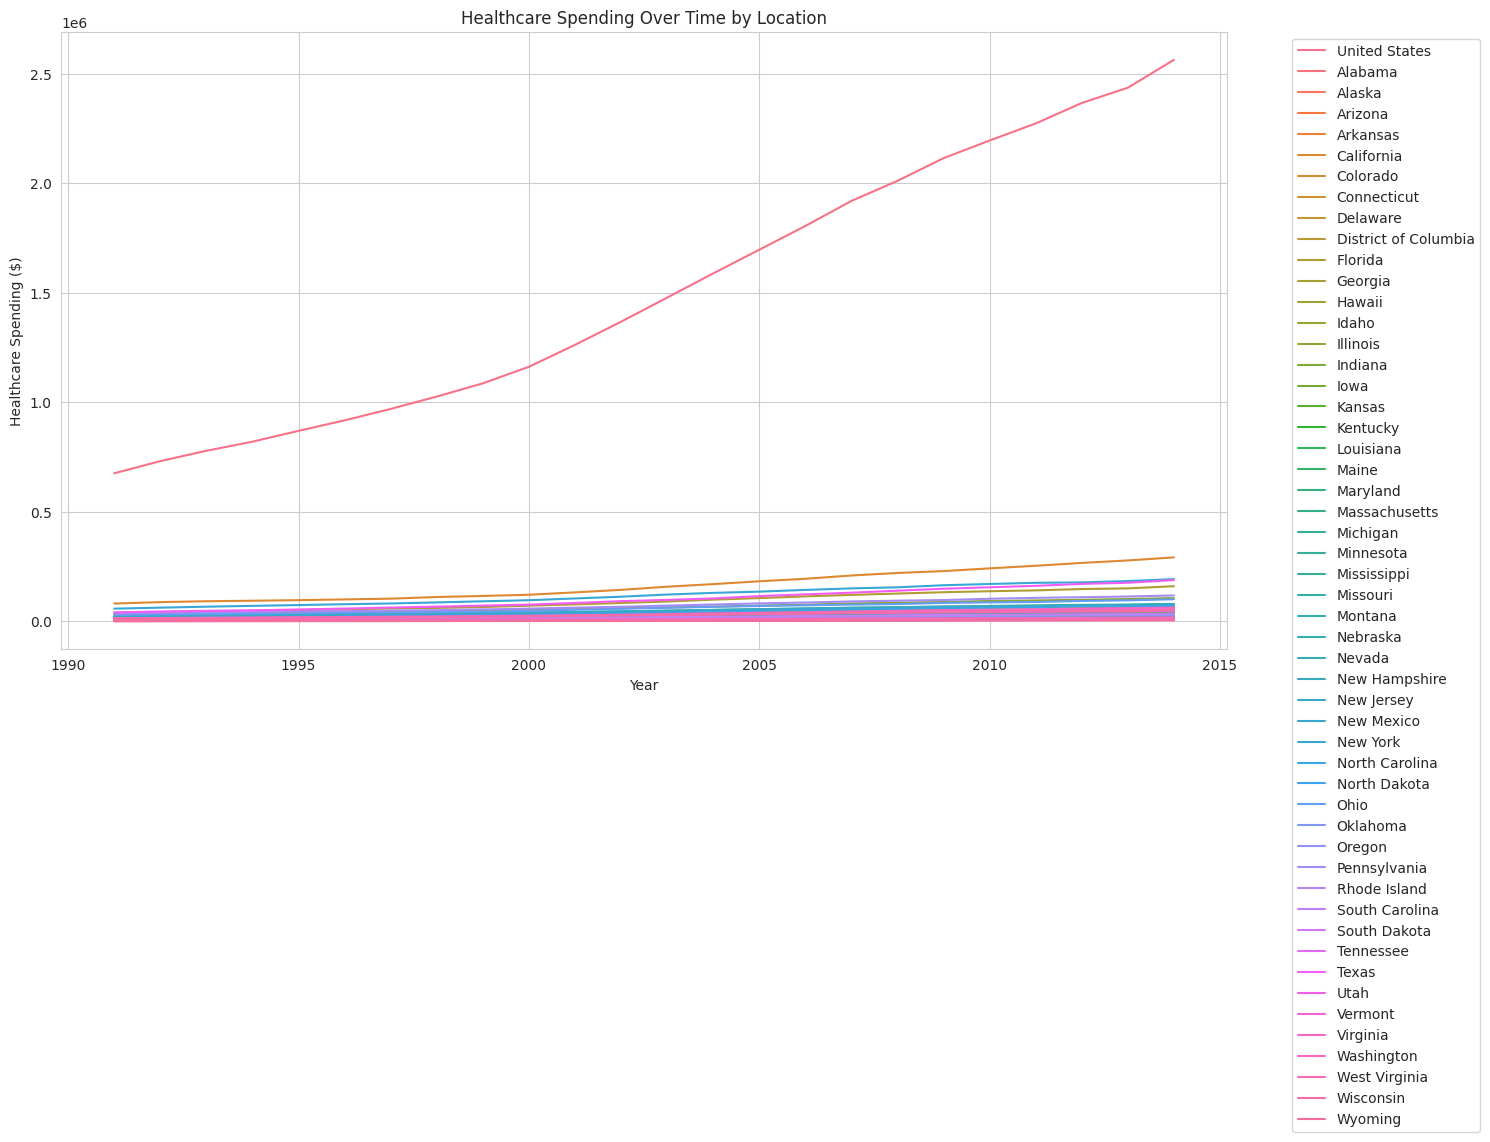

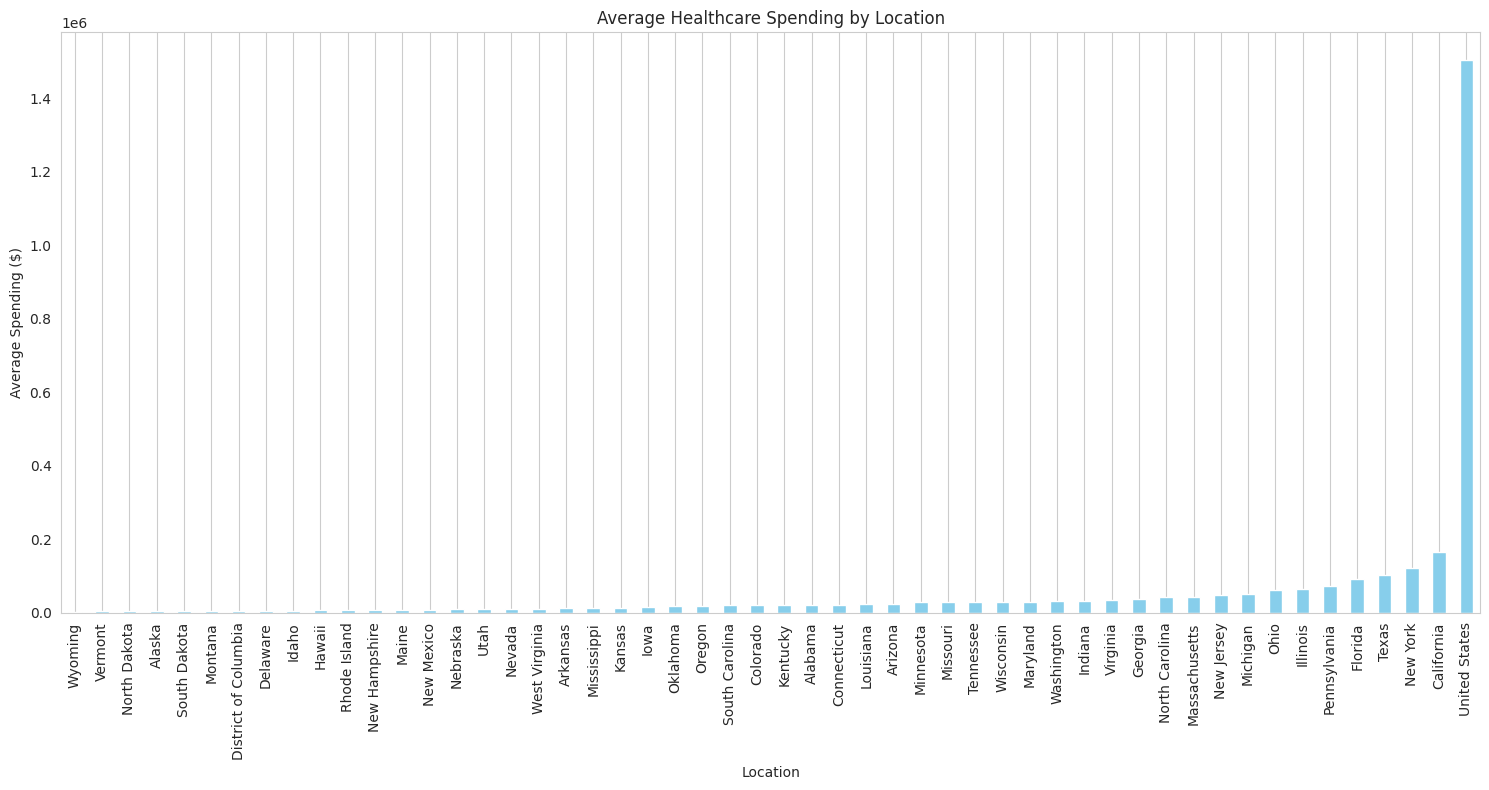

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv"
healthcare_df = pd.read_csv(url, skiprows=2)

print("\nOriginal Data: first 4 rows, first 3 columns")
print("- " *30)
print(healthcare_df.iloc[:4, :3])
print("- " *30)

# Create a plot of healthcare spending versus time color coded by states.
# The option skiprows = 2 is useful in pd.read_csv for this dataset
# since there's two lines of metadata at the top of the file.

# Identify the year columns (those ending with '__Total Health Spending')
year_cols = [col for col in healthcare_df.columns if '__Total Health Spending' in col]

# Melt the DataFrame to have 'Location' as id_vars and year_cols as value_vars
melted_df = healthcare_df.melt(id_vars=['Location'], value_vars=year_cols, var_name='Year_and_Spending', value_name='Spending')

# Extract the year from the 'Year_and_Spending' column
melted_df['Year'] = melted_df['Year_and_Spending'].str.extract(r'(\d{4})').astype(int)

# Drop the original 'Year_and_Spending' column as it's no longer needed
melted_df = melted_df.drop('Year_and_Spending', axis=1)

# Remove rows with NaN values in 'Spending' or 'Year' that might have resulted from metadata or parsing issues
melted_df.dropna(subset=['Spending', 'Year'], inplace=True)


# Set a style for the plot
sns.set_style("whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(15, 10))
sns.lineplot(data=melted_df, x='Year', y='Spending', hue='Location')
plt.title('Healthcare Spending Over Time by Location')
plt.xlabel('Year')
plt.ylabel('Healthcare Spending ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a bar plot of average healthcare spending by state
average_spending = melted_df.groupby('Location')['Spending'].mean().sort_values()
plt.figure(figsize=(15, 8))
average_spending.plot(kind='bar', color='skyblue')
plt.title('Average Healthcare Spending by Location')
plt.xlabel('Location')
plt.ylabel('Average Spending ($)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()